## Motivation for this test:

From the paper of Transferability of optimal QAOA parameters between random graphs, it says we can do so by "iterating over all edges of initial graph and selecting nodes that are p edges away from the edge". From the paper " Connecting the Hamiltonian structure to the QAOA energy and Fourier landscape structure", an analysis of the cost landscape is made for 2-qubit terms or 1-qubit terms in a given Hamiltonian. It was found that the Structure of the Hamiltonian, which is basically a graph structure, influences the roughness of the cost landscape, leading to less local minima or less roughness (studied by taking the Fourier Analysis of peaks or valleys in the cost landscape) in the cost landscape, making it easier to optimize. There is the term "parameter concentration" which is also mentionned in the paper of parity of degree in regular graphs, whose optimal parameters are compatible for d-regular graphs with d having the same parity. This is why we want to construct d-regular graphs to optimize small instances (easier for QAOA), then transfer its optimal parameters to a larger compatible graph instance. 


In [5]:
import networkx as nx 
import numpy as np
from IPython.display import Image, display
import matplotlib.pyplot as plt
import sys

sys.path.append(r"C:\Users\harsh\quactography")
from quactography.graph.undirected_graph import Graph
from quactography.adj_matrix.io import load_graph
from quactography.adj_matrix.io import save_graph
from networkx import from_numpy_array 

### Simplest example of 3-regular graphs: complete graphs of 4 nodes:

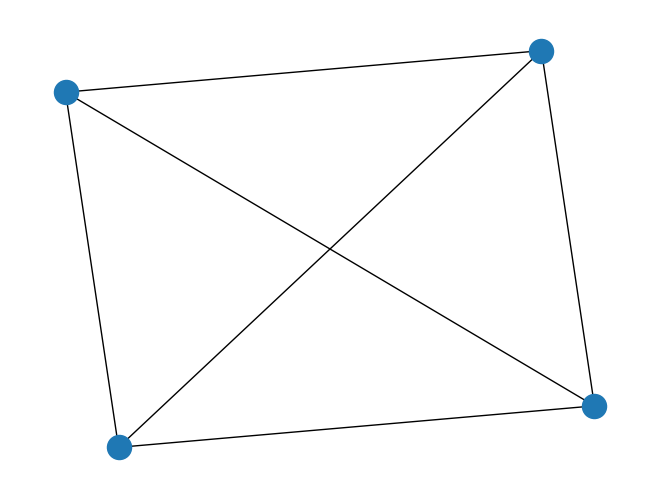

In [9]:
G = nx.random_regular_graph(3, 4)
nx.draw(G)

### Let's plot the Fibercup, and get its adjacency matrix :

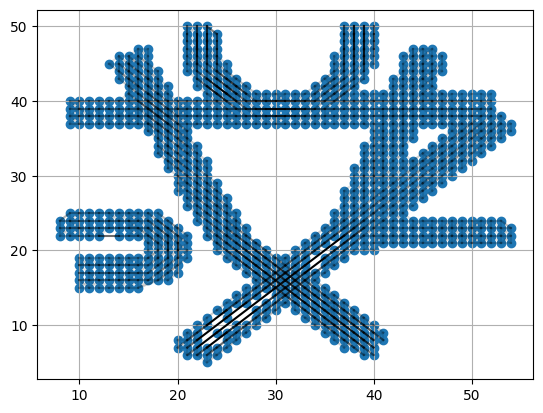

In [11]:
file = "graph.npz"
weighted_graph, node_indices, vol_dim = load_graph(file)


x, y = np.unravel_index(node_indices, vol_dim)
weighted_graph_triu = np.triu(weighted_graph)

# draw the graph
for it, node_row in enumerate(weighted_graph_triu):
    nb_adj = np.count_nonzero(node_row)
    if nb_adj > 0:
        w_all = node_row[node_row > 0]
        start_x, start_y = x[it], y[it]
        end_x = x[node_row > 0]
        end_y = y[node_row > 0]
        for vert_id in range(nb_adj):
            w = w_all[vert_id]
            alpha = np.clip(w * 0.9 + 0.1, 0.0, 1.0)
            plt.plot(
                [start_x, end_x[vert_id]],
                [start_y, end_y[vert_id]],
                color="black",
                alpha=alpha,
            )

plt.scatter(x, y)
plt.grid(True)

plt.savefig("graph_adj_mat.png")  # Save the plot as a PNG file
plt.show()

## Let's generate subgraphs from the large adjacency matrix: 
### Steps: 
 1) Read rows and columns of numpy matrix, whole matrix needed. 
 2) Look at the number of non-zero element in the row : if length is >=d, then keep this node, select 3 non-zero element : i node
 3) For a non-zero element in that row chosen, check column index :j node 
 4) Go to the row of same index and check number of non zero elements
 5) If d-1 connexions: keep, else, look for another non-zero element from first row and repeat until found
 6) Change first row if nothing found... and repeat. 
 Then the 3-regular graph for nodes i and j is built, just like in the paper we found. 

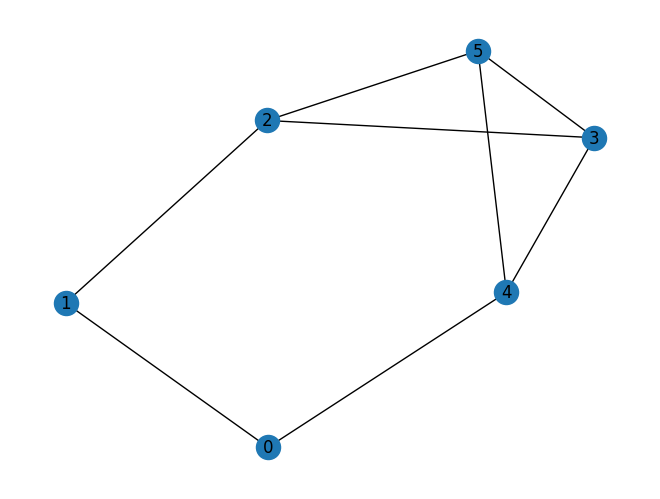

In [34]:
# PSEUDO-CODE: 
""" 
for columns, rows in numpy array(matrix) : 
Input: seed to start verifying if number of connexions sufficient (i node)
        take first row: verify if number of non-zero element is superior of equal to d
        if yes:
            keep first d non-zero element, 
        else: 
             go to next row: 
             restart loop
        take first non-zero term column index, go to that row, 
        if that row has more than d or d non-zero elements:
              keep d first non-zero elements.
        if not enough non-zero element:
              chose another non-zero element of row 1, take its column index, until d non-zero elements found for the corresponding row: 

Create a subgraph and sub-adjacency matrix to get a d-regular graph 
""" 

seed = 2 # user can change its value eventually , should be between 0 and n-1 for a n-nodes graph 
degree = 3 # user can change its value eventually, should be the degree of the regular graph the user wishes to decompose its larger graph into
 
# let's take a small toy-graph to test the code: 
adj_weighted_mat_toy = np.array([[0,1,0,0,1,0],
                                 [1,0,1,0,0,0],
                                 [0,1,0,1,0,1], 
                                 [0,0,1,0,1,1], 
                                 [1,0,0,1,0,1],
                                 [0,0,1,1,1,0]])

node_indices = [0,1,2,3,4,5]
vol_dim= (6,6) 
G = from_numpy_array(adj_weighted_mat_toy)
nx.draw(G, with_labels=True)
plt.show()


## Find all 3-regular graphs possible (thus without specifying a seed):

In [83]:
sub_graphs_possible_i_node = []
sub_graphs_potential_j_node = {}
for (num_row, row) in enumerate(adj_weighted_mat_toy):
    print(num_row, row)
    nb_adj = np.count_nonzero(row)
    if nb_adj == degree:
        sub_graphs_possible_i_node.append(num_row)   
        
                
    else:
        print(' {} is not a 3-degree node'.format(num_row))

print(sub_graphs_possible_i_node)
sub_graphs_potential_j_node

0 [0 1 0 0 1 0]
 0 is not a 3-degree node
1 [1 0 1 0 0 0]
 1 is not a 3-degree node
2 [0 1 0 1 0 1]
3 [0 0 1 0 1 1]
4 [1 0 0 1 0 1]
5 [0 0 1 1 1 0]
[2, 3, 4, 5]


{}

## Others sub-tests: 

[[0.         0.2502549  0.         ... 0.         0.         0.        ]
 [0.         0.         0.29683211 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.22661637 0.        ]
 [0.         0.         0.         ... 0.         0.         0.45713386]
 [0.         0.         0.         ... 0.         0.         0.        ]]


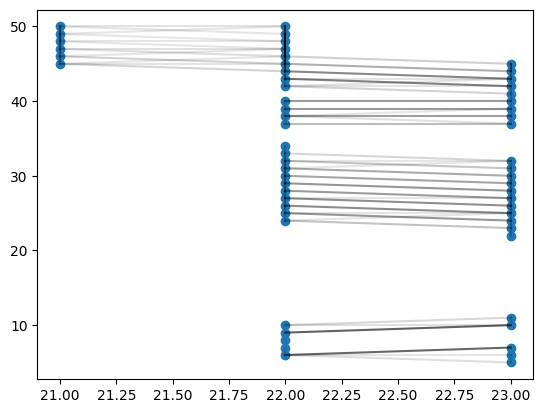

In [6]:

select_1 =230
select_2 =290
num_nodes = select_2-select_1
weighted_graph_selec = weighted_graph[select_1:select_2,select_1:select_2]
print(weighted_graph_selec)
weighted_graph_selec = np.triu(weighted_graph_selec)

x_selec = x[select_1:select_2]
y_selec = y[select_1:select_2]
# draw the graph
for it, node_row in enumerate(weighted_graph_selec):
    nb_adj = np.count_nonzero(node_row)
    if nb_adj > 0:
        w_all_selec = node_row[node_row > 0]
        start_x, start_y = x_selec[it], y_selec[it]
        end_x = x_selec[node_row > 0]
        end_y = y_selec[node_row > 0]
        for vert_id in range(nb_adj):
            w = w_all_selec[vert_id]
            alpha = np.clip(w * 0.9 + 0.1, 0.0, 1.0)
            plt.plot(
                [start_x, end_x[vert_id]],
                [start_y, end_y[vert_id]],
                color="black",
                alpha=alpha,
            )

plt.scatter(x_selec, y_selec)
plt.show()